In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec

#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn import metrics

from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
df = pd.read_csv("../dataset/df_rescaled.csv")

In [5]:
def prepare_for_apriori(df, n_bins=4):
    boolean_df = pd.DataFrame(index=df.index)

    for col in df.columns:
        if pd.api.types.is_bool_dtype(df[col]):
            # Mantieni le colonne booleane così come sono
            boolean_df[col] = df[col]

        elif pd.api.types.is_numeric_dtype(df[col]):
            # Binning su variabili numeriche
            bins = np.histogram_bin_edges(df[col].dropna(), bins=n_bins)
            binned = pd.cut(df[col], bins=bins, include_lowest=True)
            dummies = pd.get_dummies(binned, prefix=col)
            boolean_df = pd.concat([boolean_df, dummies.astype(bool)], axis=1)

    return boolean_df

In [6]:
df_pm = prepare_for_apriori(df, n_bins=4)

In [5]:
df_pm.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure_(-0.001, 0.25]',
       'tenure_(0.25, 0.5]', 'tenure_(0.5, 0.75]', 'tenure_(0.75, 1.0]',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges_(-0.001, 0.25]',
       'MonthlyCharges_(0.25, 0.5]', 'MonthlyCharges_(0.5, 0.75]',
       'MonthlyCharges_(0.75, 1.0]', 'TotalCharges_(-0.001, 0.25]',
       'TotalCharges_(0.25, 0.5]', 'TotalCharges_(0.5, 0.75]',
       'TotalCharges_(0.75, 1.0]', 'Churn', 'IsMale',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

# Frequent Itemset

In [6]:
frequent_itemsets = apriori(df_pm, min_support=0.05, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.162767,(SeniorCitizen)
1,0.484023,(Partner)
2,0.299429,(Dependents)
3,0.385307,"(tenure_(-0.001, 0.25])"
4,0.186591,"(tenure_(0.25, 0.5])"
...,...,...
7470,0.054066,"(IsMale, StreamingTV, InternetService_Fiber op..."
7471,0.055350,"(StreamingTV, InternetService_Fiber optic, Pap..."
7472,0.055635,"(StreamingTV, InternetService_Fiber optic, Pap..."
7473,0.054779,"(StreamingTV, DeviceProtection, InternetServic..."


# Association Rules

In [37]:
frequent_itemsets = apriori(df_pm, min_support=0.03, use_colnames=True)
res = association_rules(frequent_itemsets, metric="lift", min_threshold=0.75)
#export to dataframe
res1= res[['antecedents','consequents','support','confidence','lift']]
#cut at lift threshold
res2 = res1[res1['lift']>2.1]
#sort
df2=res2.sort_values(by =['lift'],ascending=(False),ignore_index=True )
#reindex
df2.index=df2.index+1
df2

,antecedents,consequents,support,confidence,lift
1,"(InternetService_Fiber optic, StreamingTV, Pho...","(tenure_(-0.001, 0.25], MonthlyCharges_(0.75, ...",0.030528,0.697068,20.191940
2,"(tenure_(-0.001, 0.25], MonthlyCharges_(0.75, ...","(InternetService_Fiber optic, StreamingTV, Pho...",0.030528,0.884298,20.191940
3,"(tenure_(-0.001, 0.25], MonthlyCharges_(0.75, ...","(InternetService_Fiber optic, StreamingMovies,...",0.030528,0.884298,20.191940
4,"(InternetService_Fiber optic, StreamingMovies,...","(tenure_(-0.001, 0.25], PhoneService, MonthlyC...",0.030528,0.697068,20.191940
5,"(tenure_(-0.001, 0.25], PhoneService, MonthlyC...","(InternetService_Fiber optic, StreamingMovies,...",0.030528,0.884298,20.191940
...,...,...,...,...,...
856834,"(StreamingTV, PhoneService, PaperlessBilling, ...",(OnlineBackup),0.058345,0.726465,2.100009
856835,"(TechSupport, DeviceProtection, PhoneService)","(StreamingTV, Partner, IsMale)",0.034522,0.232469,2.100008
856836,"(StreamingTV, Partner, IsMale)","(TechSupport, DeviceProtection, PhoneService)",0.034522,0.311856,2.100008
856837,"(PaymentMethod_Electronic check, Churn, PhoneS...","(PaperlessBilling, SeniorCitizen)",0.036234,0.262126,2.100003


In [38]:
#select all the rules where the consequnts is (Churn)
df2[df2['consequents'].apply(lambda x: 'Churn' in x)]
#select all the rules where the consequnts is (Churn) only
df2_churn = df2[df2['consequents'].apply(lambda x: 'Churn' in x) & df2['consequents'].apply(lambda x: len(x)==1)]

#reindex


In [29]:
df2_churn

,antecedents,consequents,support,confidence,lift
50275,"(InternetService_Fiber optic, PhoneService, Pa...",(Churn),0.063053,0.722222,2.726321
50276,"(InternetService_Fiber optic, PaperlessBilling...",(Churn),0.063053,0.722222,2.726321
50277,"(InternetService_Fiber optic, PaperlessBilling...",(Churn),0.063053,0.722222,2.726321
50281,"(InternetService_Fiber optic, PhoneService, Pa...",(Churn),0.063053,0.722222,2.726321
50619,"(InternetService_Fiber optic, PhoneService, Pa...",(Churn),0.063195,0.720325,2.719160
...,...,...,...,...,...
90975,"(MultipleLines, Contract_Month-to-month, Total...",(Churn),0.065763,0.560146,2.114498
91161,"(StreamingTV, Contract_Month-to-month, PhoneSe...",(Churn),0.050785,0.559748,2.112998
91163,"(InternetService_Fiber optic, StreamingTV, Pho...",(Churn),0.050785,0.559748,2.112998
91164,"(StreamingTV, Contract_Month-to-month, Monthly...",(Churn),0.050785,0.559748,2.112998


In [39]:
#print the most significant rules in terms of lift
df2_churn.iloc[0:5,:]
#print formatted output
for i in range(0,5):
    print("Rule: ",df2_churn.iloc[i,0], " -> ",df2_churn.iloc[i,1])
    print("Support: ",df2_churn.iloc[i,2])
    print("Confidence: ",df2_churn.iloc[i,3])
    print("Lift: ",df2_churn.iloc[i,4])
    print("\n")

Rule:  frozenset({'InternetService_Fiber optic', 'PaperlessBilling', 'tenure_(-0.001, 0.25]', 'TotalCharges_(-0.001, 0.25]', 'PaymentMethod_Electronic check', 'MultipleLines', 'Contract_Month-to-month'})  ->  frozenset({'Churn'})
Support:  0.03195435092724679
Confidence:  0.767123287671233
Lift:  2.8958181187804755


Rule:  frozenset({'InternetService_Fiber optic', 'PaperlessBilling', 'tenure_(-0.001, 0.25]', 'PaymentMethod_Electronic check', 'MultipleLines', 'Contract_Month-to-month'})  ->  frozenset({'Churn'})
Support:  0.03195435092724679
Confidence:  0.767123287671233
Lift:  2.8958181187804755


Rule:  frozenset({'InternetService_Fiber optic', 'PhoneService', 'PaperlessBilling', 'tenure_(-0.001, 0.25]', 'PaymentMethod_Electronic check', 'MultipleLines', 'Contract_Month-to-month'})  ->  frozenset({'Churn'})
Support:  0.03195435092724679
Confidence:  0.767123287671233
Lift:  2.8958181187804755


Rule:  frozenset({'InternetService_Fiber optic', 'PhoneService', 'PaperlessBilling', 'ten

In [40]:
# print the most significant rules in terms of confidence
#order by confidence
df2_churn = df2_churn.sort_values(by =['lift'],ascending=(False),ignore_index=True )


df2_churn.iloc[0:5,:]
#print formatted output
for i in range(0,5):
    print("Rule: ",df2_churn.iloc[i,0], " -> ",df2_churn.iloc[i,1])
    print("Support: ",df2_churn.iloc[i,2])
    print("Confidence: ",df2_churn.iloc[i,3])
    print("Lift: ",df2_churn.iloc[i,4])
    print("\n")

Rule:  frozenset({'InternetService_Fiber optic', 'PaperlessBilling', 'tenure_(-0.001, 0.25]', 'TotalCharges_(-0.001, 0.25]', 'PaymentMethod_Electronic check', 'MultipleLines', 'Contract_Month-to-month'})  ->  frozenset({'Churn'})
Support:  0.03195435092724679
Confidence:  0.767123287671233
Lift:  2.8958181187804755


Rule:  frozenset({'InternetService_Fiber optic', 'PhoneService', 'PaperlessBilling', 'tenure_(-0.001, 0.25]', 'TotalCharges_(-0.001, 0.25]', 'PaymentMethod_Electronic check', 'MultipleLines', 'Contract_Month-to-month'})  ->  frozenset({'Churn'})
Support:  0.03195435092724679
Confidence:  0.767123287671233
Lift:  2.8958181187804755


Rule:  frozenset({'InternetService_Fiber optic', 'PaperlessBilling', 'tenure_(-0.001, 0.25]', 'PaymentMethod_Electronic check', 'MultipleLines', 'Contract_Month-to-month'})  ->  frozenset({'Churn'})
Support:  0.03195435092724679
Confidence:  0.767123287671233
Lift:  2.8958181187804755


Rule:  frozenset({'InternetService_Fiber optic', 'PhoneSer

In [41]:
# print the most significant rules in terms of confidence
#order by confidence
df2_churn = df2_churn.sort_values(by =['confidence'],ascending=(False),ignore_index=True )


df2_churn.iloc[0:5,:]
#print formatted output
for i in range(0,5):
    print("Rule: ",df2_churn.iloc[i,0], " -> ",df2_churn.iloc[i,1])
    print("Support: ",df2_churn.iloc[i,2])
    print("Confidence: ",df2_churn.iloc[i,3])
    print("Lift: ",df2_churn.iloc[i,4])
    print("\n")

Rule:  frozenset({'InternetService_Fiber optic', 'PaperlessBilling', 'tenure_(-0.001, 0.25]', 'TotalCharges_(-0.001, 0.25]', 'PaymentMethod_Electronic check', 'MultipleLines', 'Contract_Month-to-month'})  ->  frozenset({'Churn'})
Support:  0.03195435092724679
Confidence:  0.767123287671233
Lift:  2.8958181187804755


Rule:  frozenset({'InternetService_Fiber optic', 'PhoneService', 'PaperlessBilling', 'tenure_(-0.001, 0.25]', 'PaymentMethod_Electronic check', 'MultipleLines', 'Contract_Month-to-month'})  ->  frozenset({'Churn'})
Support:  0.03195435092724679
Confidence:  0.767123287671233
Lift:  2.8958181187804755


Rule:  frozenset({'InternetService_Fiber optic', 'PhoneService', 'PaperlessBilling', 'tenure_(-0.001, 0.25]', 'TotalCharges_(-0.001, 0.25]', 'PaymentMethod_Electronic check', 'MultipleLines', 'Contract_Month-to-month'})  ->  frozenset({'Churn'})
Support:  0.03195435092724679
Confidence:  0.767123287671233
Lift:  2.8958181187804755


Rule:  frozenset({'InternetService_Fiber o

In [42]:
# print the most significant rules in terms of support
#order by support
df2_churn = df2_churn.sort_values(by =['support'],ascending=(False),ignore_index=True )
df2_churn.iloc[0:5,:]
#print formatted output
for i in range(0,5):
    print("Rule: ",df2_churn.iloc[i,0], " -> ",df2_churn.iloc[i,1])
    print("Support: ",df2_churn.iloc[i,2])
    print("Confidence: ",df2_churn.iloc[i,3])
    print("Lift: ",df2_churn.iloc[i,4])
    print("\n")

Rule:  frozenset({'InternetService_Fiber optic', 'PaperlessBilling', 'Contract_Month-to-month'})  ->  frozenset({'Churn'})
Support:  0.13637660485021397
Confidence:  0.5680332739156267
Lift:  2.1442720787014236


Rule:  frozenset({'InternetService_Fiber optic', 'PaperlessBilling', 'Contract_Month-to-month', 'PhoneService'})  ->  frozenset({'Churn'})
Support:  0.13637660485021397
Confidence:  0.5680332739156267
Lift:  2.1442720787014236


Rule:  frozenset({'PaperlessBilling', 'tenure_(-0.001, 0.25]', 'Contract_Month-to-month', 'TotalCharges_(-0.001, 0.25]'})  ->  frozenset({'Churn'})
Support:  0.12253922967189729
Confidence:  0.5703851261620185
Lift:  2.1531500992976578


Rule:  frozenset({'PaperlessBilling', 'tenure_(-0.001, 0.25]', 'Contract_Month-to-month'})  ->  frozenset({'Churn'})
Support:  0.12253922967189729
Confidence:  0.5703851261620185
Lift:  2.1531500992976578


Rule:  frozenset({'InternetService_Fiber optic', 'TotalCharges_(-0.001, 0.25]'})  ->  frozenset({'Churn'})
Suppor

# pyfim

In [7]:
from fim import apriori

In [8]:
X = df_pm.copy()

In [10]:
X

,SeniorCitizen,Partner,Dependents,"tenure_(-0.001, 0.25]","tenure_(0.25, 0.5]","tenure_(0.5, 0.75]","tenure_(0.75, 1.0]",PhoneService,MultipleLines,OnlineSecurity,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,False,True,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
1,False,False,False,False,True,False,False,True,False,True,...,False,True,False,False,False,False,True,True,False,False
2,False,False,False,True,False,False,False,True,False,True,...,True,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,True,False,False,False,True,...,False,True,False,True,False,False,False,True,False,False
4,False,False,False,True,False,False,False,True,False,False,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,False,True,True,False,True,False,False,True,True,True,...,False,True,False,False,False,False,True,True,False,False
7006,False,True,True,False,False,False,True,True,True,False,...,False,True,False,False,True,False,False,False,True,False
7007,False,True,True,True,False,False,False,False,False,True,...,True,False,False,False,False,True,False,True,False,False
7008,True,True,False,True,False,False,False,True,True,False,...,True,False,False,False,False,False,True,False,True,False


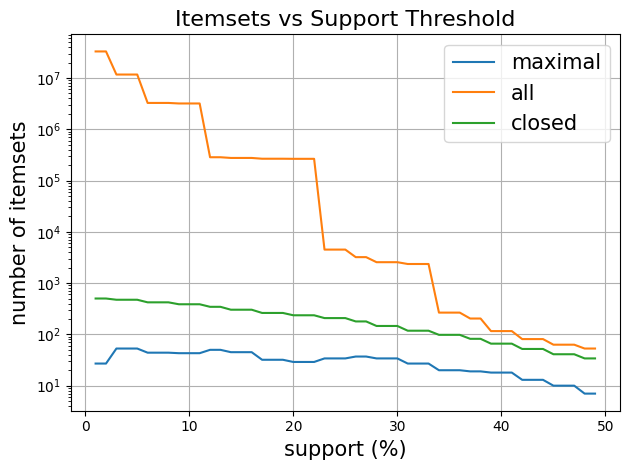

In [ ]:
# Lista dei supporti in percentuale
supports = list(range(1, 50))  # 1% to 50%

len_max_it = []
len_cl_it = []
len_all_it = []

for supp in supports:
    max_itemsets = apriori(X, target='m', supp=supp, zmin=1)
    cl_itemsets = apriori(X, target='c', supp=supp, zmin=1)
    all_itemsets = apriori(X, target='s', supp=supp, zmin=1)
    
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))
    len_all_it.append(len(all_itemsets))
    
plt.figure(figsize=(8,5))
# Plot
plt.plot(supports, len_max_it, label='maximal')
plt.plot(supports, len_all_it, label='all',color='red')
plt.plot(supports, len_cl_it, label='closed')

plt.xlabel('support (%)')
plt.ylabel('number of itemsets')
plt.title('Itemsets vs Support Threshold')
plt.grid(True)
#logarithmic scale
plt.yscale('log')
plt.tight_layout()
plt.show()


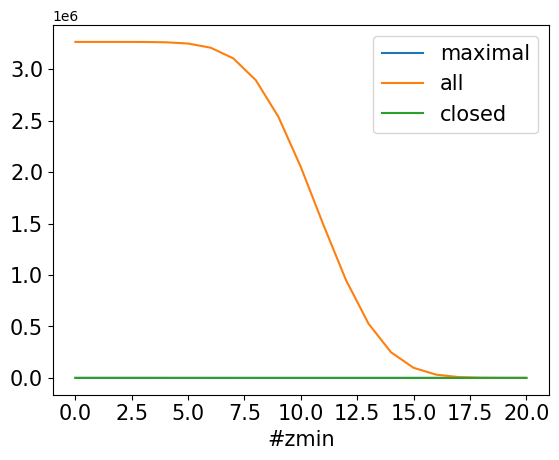

In [ ]:
len_max_it = []
len_cl_it = []
len_all_it = []
for i in range(0, 20+1):
    max_itemsets = apriori(X, target='m', supp=6, zmin=i)
    cl_itemsets = apriori(X, target='c', supp=6, zmin=i)
    len_max_it.append( len(max_itemsets)  )
    len_cl_it.append( len(cl_itemsets) )
    all_itemsets = apriori(X, target='s', supp=6, zmin=i)
    len_all_it.append( len(all_itemsets) )


plt.plot(len_max_it, label='maximal')
plt.plot(len_all_it, label='all')
plt.plot(len_cl_it, label='closed')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('#zmin', fontsize=15)

plt.show()

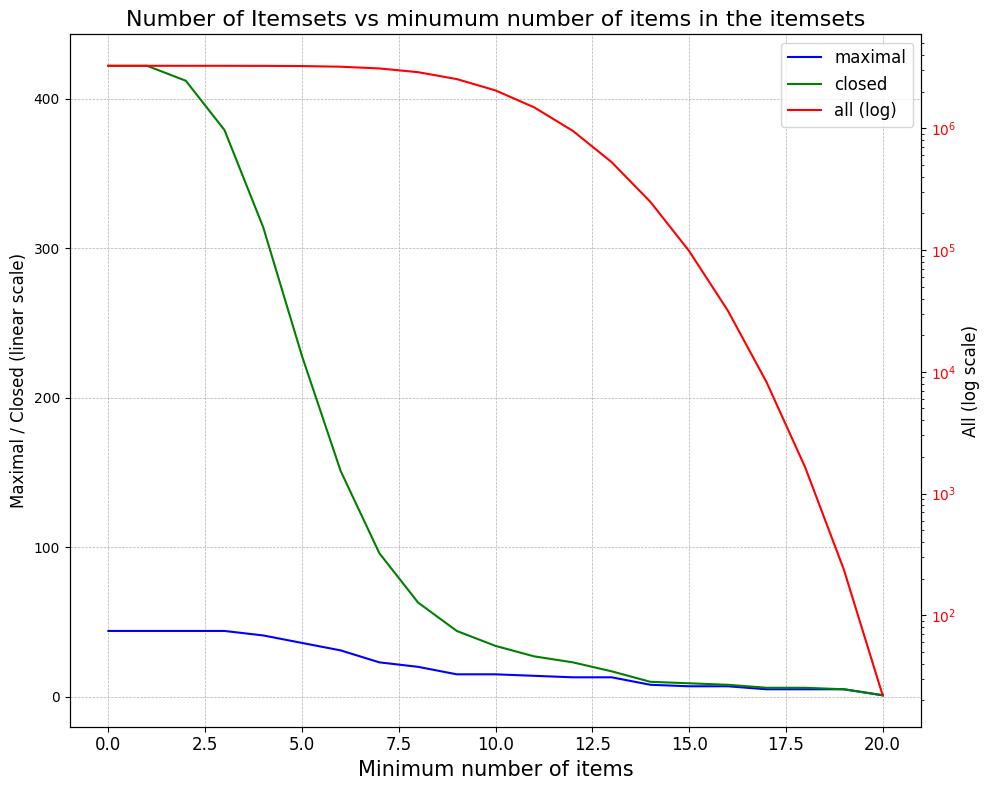

In [19]:
fig, ax1 = plt.subplots(figsize=(10,8))

# Set title
plt.title('Number of Itemsets vs minumum number of items in the itemsets', fontsize=16)

# Primo asse (lineare, sinistra)
ax1.plot(len_max_it, label='maximal', color='blue')
ax1.plot(len_cl_it, label='closed', color='green')
ax1.set_ylabel('Maximal / Closed (linear scale)', fontsize=12)
ax1.set_xlabel('Minimum number of items', fontsize=15)
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelsize=12)

# Secondo asse (logaritmico, destra)
ax2 = ax1.twinx()
ax2.plot(len_all_it, label='all (log)', color='red')
ax2.set_yscale('log')
ax2.set_ylabel('All (log scale)', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Unificare le legende
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=12, loc='upper right')
# Formattazione della griglia
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.tight_layout()
plt.show()